# 1.Imports and Setup

In [4]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


# 2.Load Dataset

In [5]:
df = pd.read_csv('../data/raw/fake_job_postings.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Total Rows: {len(df):,}")
print(f"Total Columns: {df.shape[1]}")
df.head()

Dataset Shape: (17880, 18)
Total Rows: 17,880
Total Columns: 18


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# 3. Dataset information


In [6]:
print("="*80)
print("DATASET INFORMATION")
print("="*80)

df.info()

print("\n" + "="*80)
print("COLUMN NAMES")
print("="*80)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-nu

# 4. Target variable distribution


TARGET VARIABLE DISTRIBUTION

Real Jobs (0): 17,014 (95.16%)
Fake Jobs (1): 866 (4.84%)
Imbalance Ratio: 19.65:1


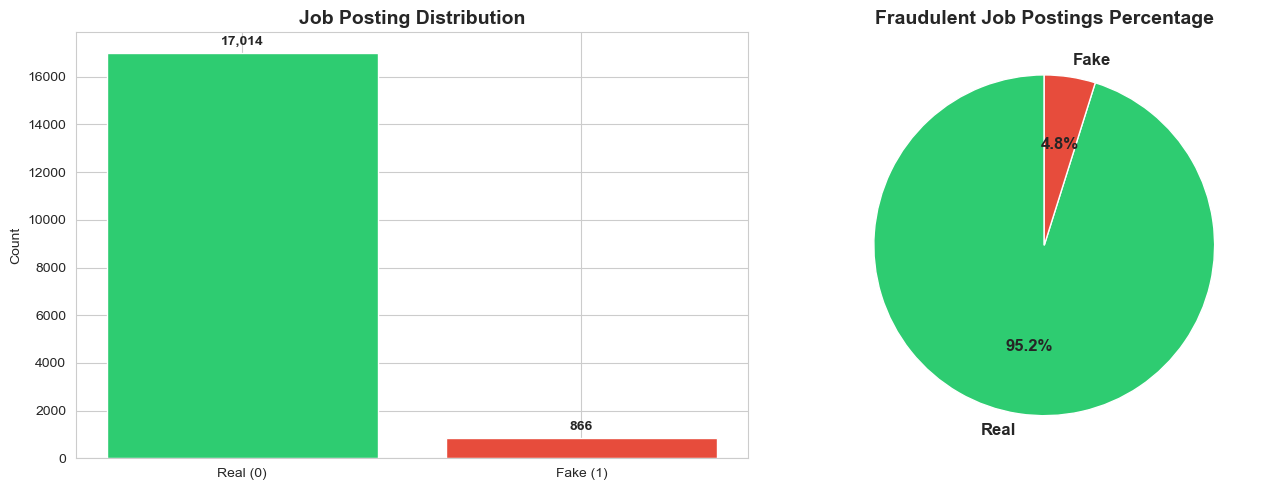


⚠️ Dataset is HIGHLY IMBALANCED - will need SMOTE or class weights


In [9]:
import os

print("="*80)
print("TARGET VARIABLE DISTRIBUTION")
print("="*80)

fraud_counts = df['fraudulent'].value_counts()
fraud_pct = df['fraudulent'].value_counts(normalize=True) * 100

print(f"\nReal Jobs (0): {fraud_counts[0]:,} ({fraud_pct[0]:.2f}%)")
print(f"Fake Jobs (1): {fraud_counts[1]:,} ({fraud_pct[1]:.2f}%)")
print(f"Imbalance Ratio: {fraud_counts[0]/fraud_counts[1]:.2f}:1")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(['Real (0)', 'Fake (1)'], fraud_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Job Posting Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(fraud_counts.values):
    axes[0].text(i, v + 200, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(fraud_counts.values, labels=['Real', 'Fake'], autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Fraudulent Job Postings Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()

# Create directory if it doesn't exist
output_dir = '../data/delivrables'
os.makedirs(output_dir, exist_ok=True)

plt.savefig(f'{output_dir}/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n⚠️ Dataset is HIGHLY IMBALANCED - will need SMOTE or class weights")

#  5. Missing values analysis


MISSING VALUES ANALYSIS

Columns with Missing Values:
             Column  Missing_Count  Missing_Percentage
       salary_range          15012           83.959732
         department          11547           64.580537
 required_education           8105           45.329978
           benefits           7212           40.335570
required_experience           7050           39.429530
           function           6455           36.101790
           industry           4903           27.421700
    employment_type           3471           19.412752
    company_profile           3308           18.501119
       requirements           2696           15.078300
           location            346            1.935123
        description              1            0.005593


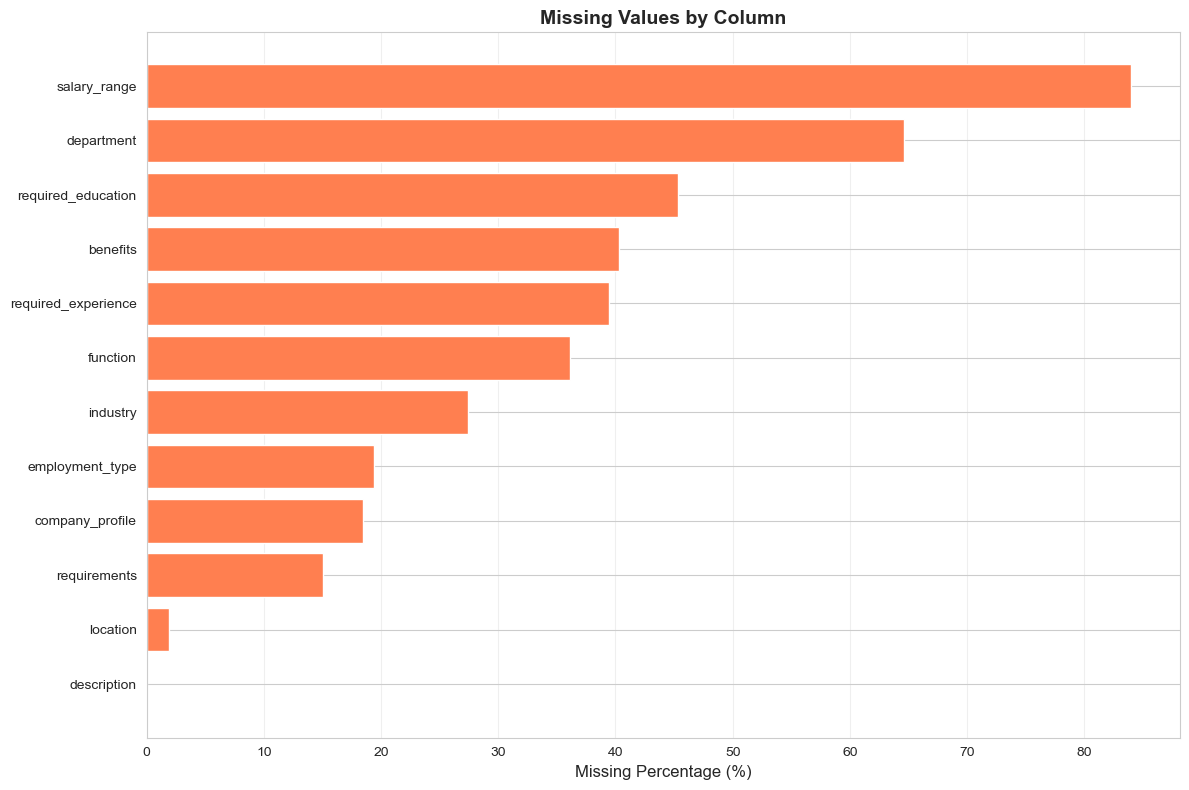

In [10]:
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
}).sort_values('Missing_Count', ascending=False)

print("\nColumns with Missing Values:")
print(missing_df[missing_df['Missing_Count'] > 0].to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))
missing_cols = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count')
ax.barh(missing_cols['Column'], missing_cols['Missing_Percentage'], color='coral')
ax.set_xlabel('Missing Percentage (%)', fontsize=12)
ax.set_title('Missing Values by Column', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../Data/delivrables/missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Text features analysis


TEXT FEATURES ANALYSIS

TITLE:
  Non-null: 17,880 (100.0%)
  Avg length: 29 characters

COMPANY_PROFILE:
  Non-null: 14,572 (81.5%)
  Avg length: 762 characters

DESCRIPTION:
  Non-null: 17,879 (100.0%)
  Avg length: 1218 characters

REQUIREMENTS:
  Non-null: 15,184 (84.9%)
  Avg length: 695 characters

BENEFITS:
  Non-null: 10,668 (59.7%)
  Avg length: 350 characters


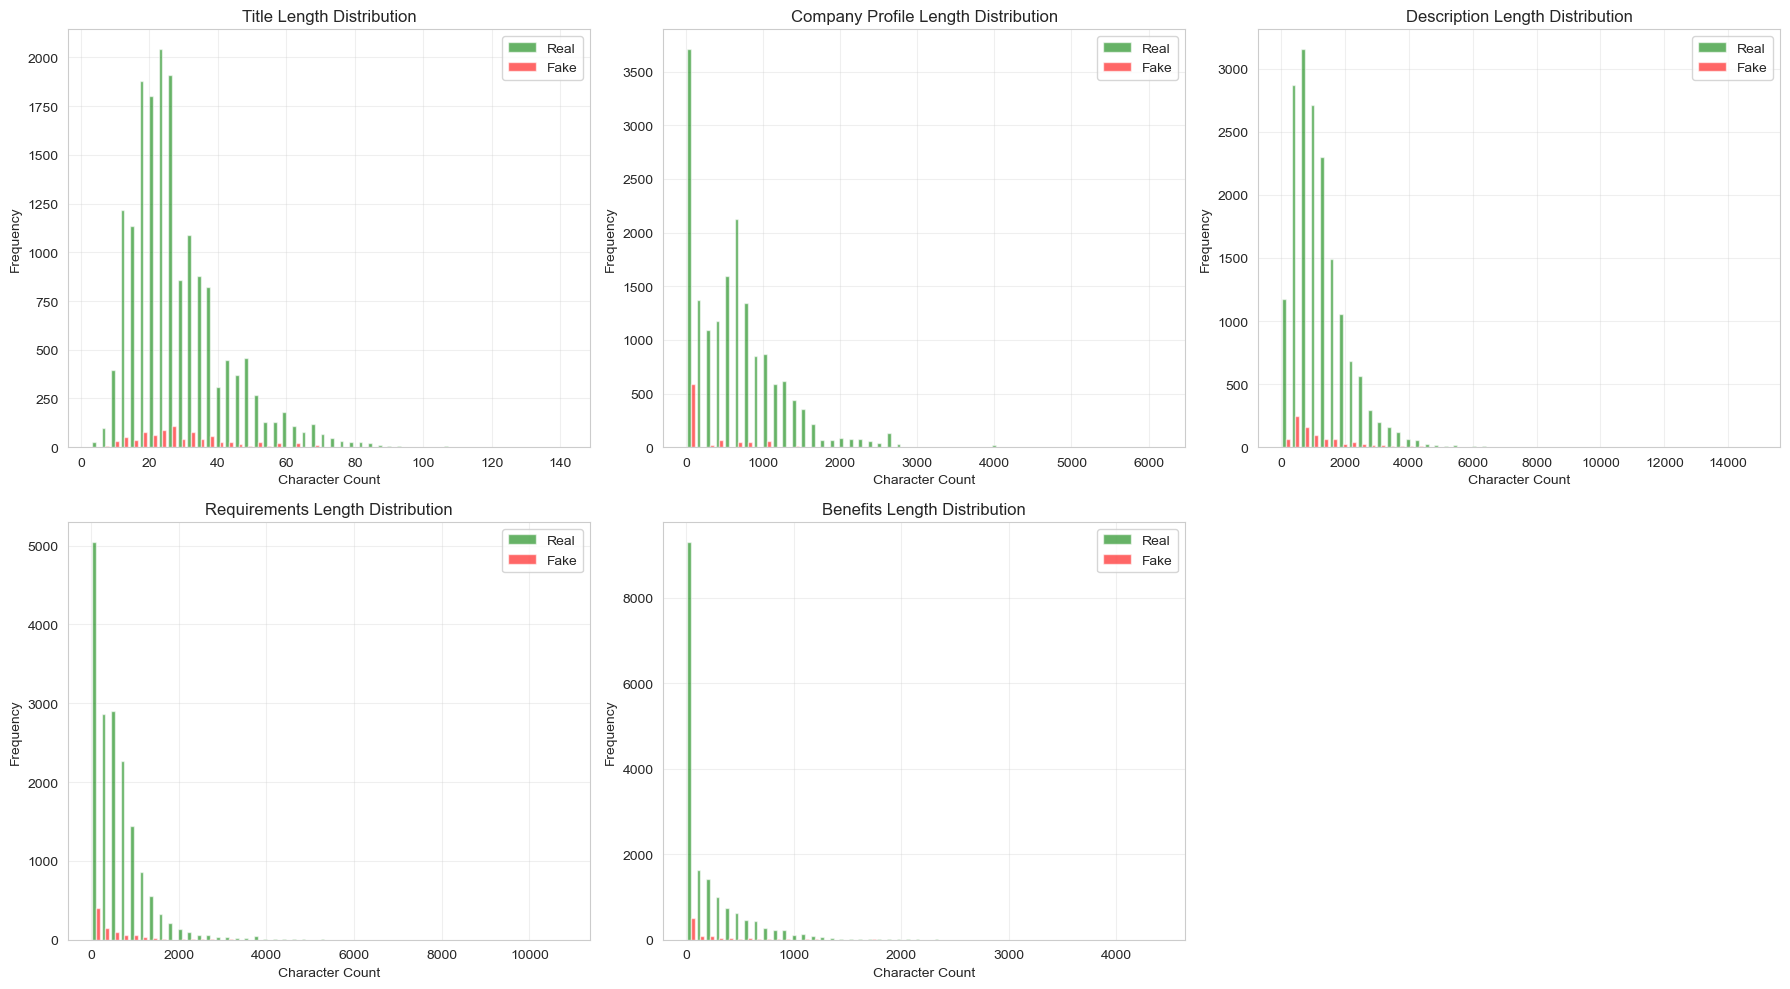

In [11]:
print("="*80)
print("TEXT FEATURES ANALYSIS")
print("="*80)

text_cols = ['title', 'company_profile', 'description', 'requirements', 'benefits']

for col in text_cols:
    print(f"\n{col.upper()}:")
    print(f"  Non-null: {df[col].notna().sum():,} ({df[col].notna().sum()/len(df)*100:.1f}%)")
    if df[col].notna().sum() > 0:
        avg_length = df[col].dropna().str.len().mean()
        print(f"  Avg length: {avg_length:.0f} characters")

# Add text length features
for col in text_cols:
    df[f'{col}_length'] = df[col].fillna('').str.len()

# Compare text lengths: Real vs Fake
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(text_cols):
    real_lengths = df[df['fraudulent'] == 0][f'{col}_length']
    fake_lengths = df[df['fraudulent'] == 1][f'{col}_length']
    
    axes[idx].hist([real_lengths, fake_lengths], bins=50, label=['Real', 'Fake'], 
                   color=['green', 'red'], alpha=0.6)
    axes[idx].set_title(f'{col.replace("_", " ").title()} Length Distribution')
    axes[idx].set_xlabel('Character Count')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

axes[5].axis('off')
plt.tight_layout()
plt.savefig('../Data/delivrables/text_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. WordCloud for Real vs Fake jobs


WORD CLOUD GENERATION


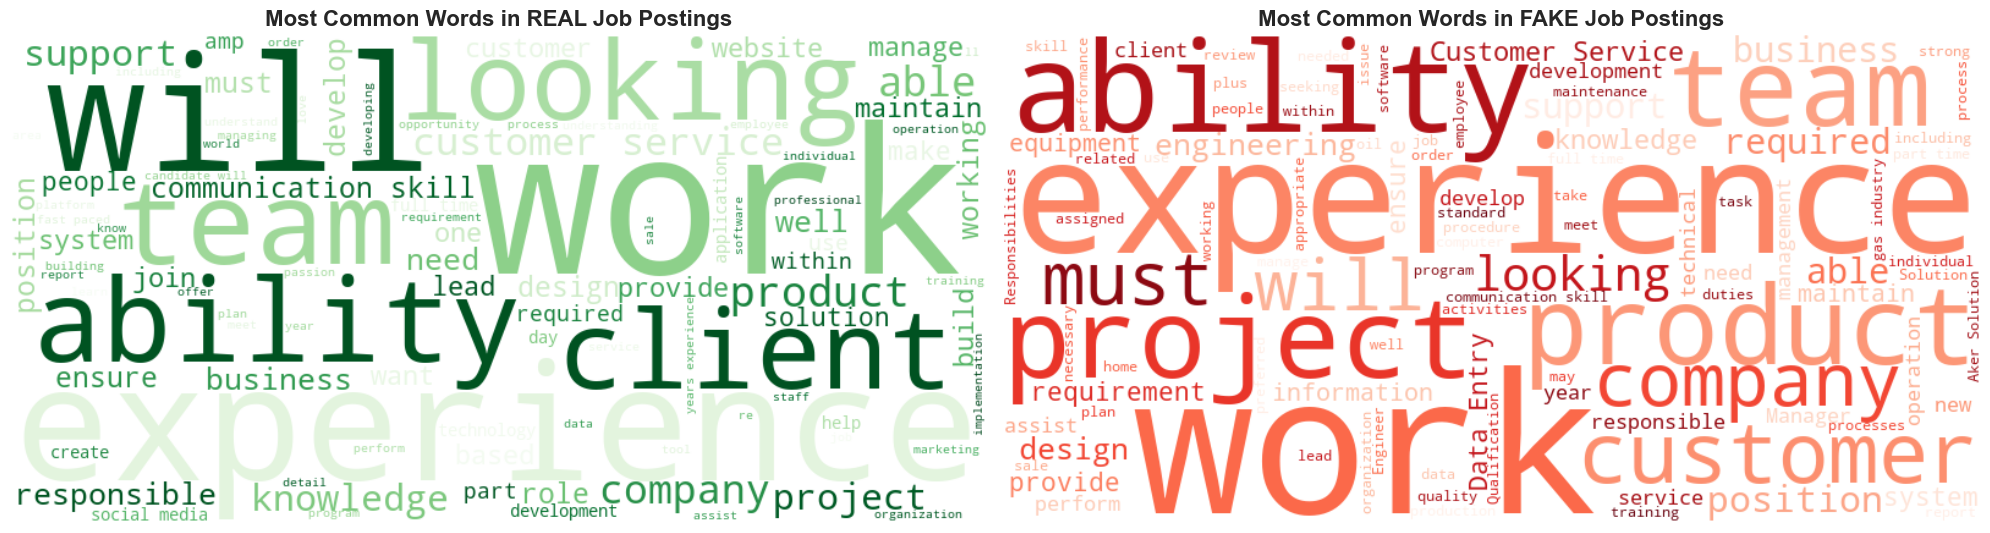

In [12]:
print("="*80)
print("WORD CLOUD GENERATION")
print("="*80)

# Combine all text columns
df['full_text'] = (df['title'].fillna('') + ' ' + 
                   df['description'].fillna('') + ' ' + 
                   df['requirements'].fillna(''))

real_text = ' '.join(df[df['fraudulent'] == 0]['full_text'].values)
fake_text = ' '.join(df[df['fraudulent'] == 1]['full_text'].values)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Real jobs wordcloud
wordcloud_real = WordCloud(width=800, height=400, background_color='white', 
                           colormap='Greens', max_words=100).generate(real_text)
axes[0].imshow(wordcloud_real, interpolation='bilinear')
axes[0].set_title('Most Common Words in REAL Job Postings', fontsize=16, fontweight='bold')
axes[0].axis('off')

# Fake jobs wordcloud
wordcloud_fake = WordCloud(width=800, height=400, background_color='white', 
                           colormap='Reds', max_words=100).generate(fake_text)
axes[1].imshow(wordcloud_fake, interpolation='bilinear')
axes[1].set_title('Most Common Words in FAKE Job Postings', fontsize=16, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.savefig('../Data/delivrables/wordcloud_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. Categorical features analysis


CATEGORICAL FEATURES ANALYSIS

EMPLOYMENT_TYPE:
  Unique values: 5
  Top 5 values:
employment_type
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227

REQUIRED_EXPERIENCE:
  Unique values: 7
  Top 5 values:
required_experience
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389

REQUIRED_EDUCATION:
  Unique values: 13
  Top 5 values:
required_education
Bachelor's Degree            5145
High School or equivalent    2080
Unspecified                  1397
Master's Degree               416
Associate Degree              274

INDUSTRY:
  Unique values: 131
  Top 5 values:
industry
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822

FUNCTION:
  Unique values: 37
  Top 5 values:
function
Information Technology   

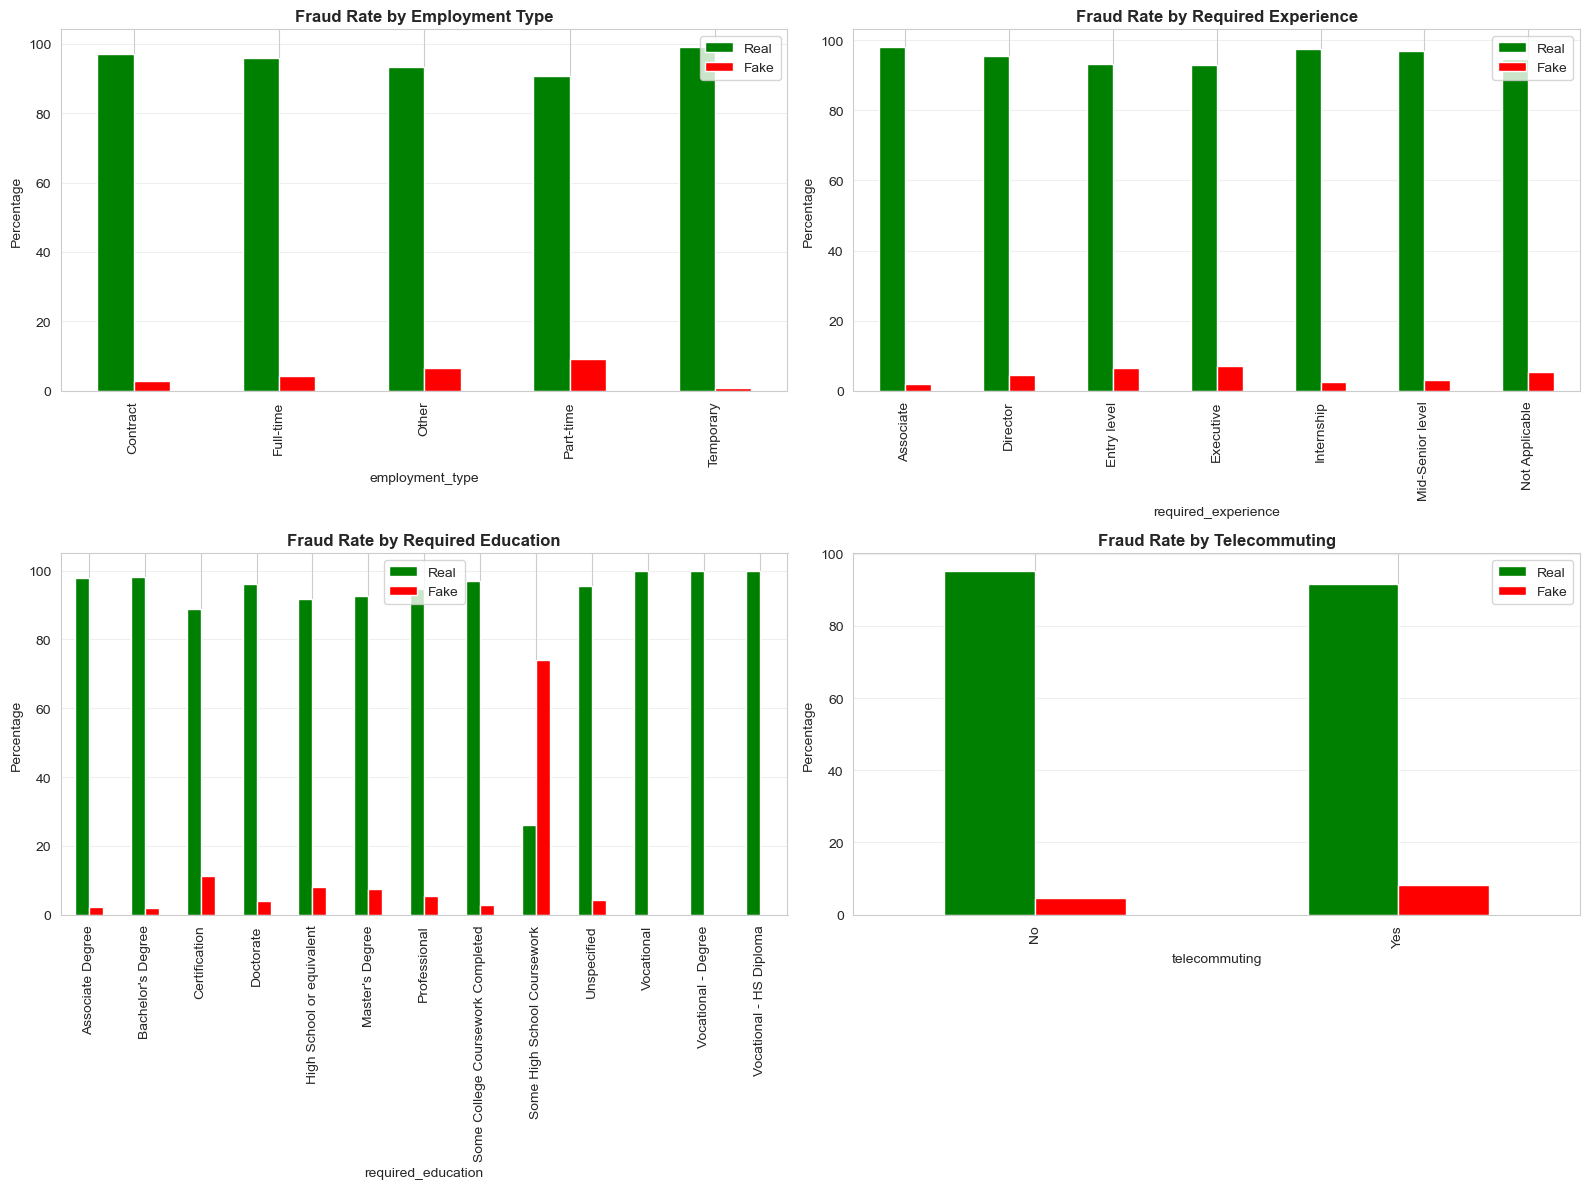

In [13]:
print("="*80)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*80)

cat_cols = ['employment_type', 'required_experience', 'required_education', 
            'industry', 'function']

for col in cat_cols:
    print(f"\n{col.upper()}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Top 5 values:")
    print(df[col].value_counts().head().to_string())

# Visualization: Employment Type
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Employment Type
emp_fraud = pd.crosstab(df['employment_type'], df['fraudulent'], normalize='index') * 100
emp_fraud.plot(kind='bar', ax=axes[0, 0], color=['green', 'red'])
axes[0, 0].set_title('Fraud Rate by Employment Type', fontweight='bold')
axes[0, 0].set_ylabel('Percentage')
axes[0, 0].legend(['Real', 'Fake'])
axes[0, 0].grid(axis='y', alpha=0.3)

# Required Experience
exp_fraud = pd.crosstab(df['required_experience'], df['fraudulent'], normalize='index') * 100
exp_fraud.plot(kind='bar', ax=axes[0, 1], color=['green', 'red'])
axes[0, 1].set_title('Fraud Rate by Required Experience', fontweight='bold')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(['Real', 'Fake'])
axes[0, 1].grid(axis='y', alpha=0.3)

# Required Education
edu_fraud = pd.crosstab(df['required_education'], df['fraudulent'], normalize='index') * 100
edu_fraud.plot(kind='bar', ax=axes[1, 0], color=['green', 'red'])
axes[1, 0].set_title('Fraud Rate by Required Education', fontweight='bold')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].legend(['Real', 'Fake'])
axes[1, 0].grid(axis='y', alpha=0.3)

# Telecommuting
tele_fraud = pd.crosstab(df['telecommuting'], df['fraudulent'], normalize='index') * 100
tele_fraud.plot(kind='bar', ax=axes[1, 1], color=['green', 'red'])
axes[1, 1].set_title('Fraud Rate by Telecommuting', fontweight='bold')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(['Real', 'Fake'])
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['No', 'Yes'])
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../Data/delivrables/categorical_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 9. Boolean features analysis


BOOLEAN FEATURES ANALYSIS

Boolean Feature Comparison:
         Feature  Real Jobs (%)  Fake Jobs (%)  Difference
   Telecommuting       4.131891       7.390300    3.258409
Has Company Logo      81.914894      32.678984   49.235910
   Has Questions      50.205713      28.868360   21.337353


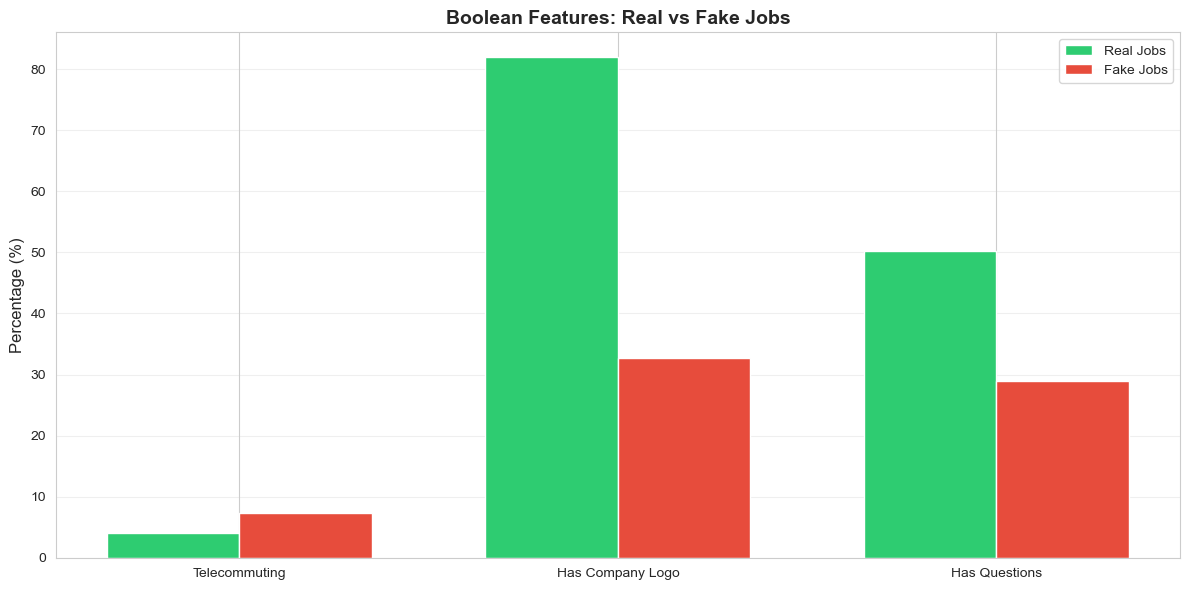


🔑 KEY INSIGHT: Fake jobs have significantly fewer company logos and questions!


In [14]:
print("="*80)
print("BOOLEAN FEATURES ANALYSIS")
print("="*80)

bool_cols = ['telecommuting', 'has_company_logo', 'has_questions']

# Create comparison dataframe
comparison_data = []
for col in bool_cols:
    real_rate = df[df['fraudulent'] == 0][col].mean() * 100
    fake_rate = df[df['fraudulent'] == 1][col].mean() * 100
    comparison_data.append({
        'Feature': col.replace('_', ' ').title(),
        'Real Jobs (%)': real_rate,
        'Fake Jobs (%)': fake_rate,
        'Difference': abs(real_rate - fake_rate)
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nBoolean Feature Comparison:")
print(comparison_df.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(bool_cols))
width = 0.35

real_rates = [df[df['fraudulent'] == 0][col].mean() * 100 for col in bool_cols]
fake_rates = [df[df['fraudulent'] == 1][col].mean() * 100 for col in bool_cols]

ax.bar(x - width/2, real_rates, width, label='Real Jobs', color='#2ecc71')
ax.bar(x + width/2, fake_rates, width, label='Fake Jobs', color='#e74c3c')

ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Boolean Features: Real vs Fake Jobs', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([col.replace('_', ' ').title() for col in bool_cols])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../Data/delivrables/boolean_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🔑 KEY INSIGHT: Fake jobs have significantly fewer company logos and questions!")

# 10. Location analysis


LOCATION ANALYSIS

Top 15 Locations:
location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
US, TX, Houston          269
US, IL, Chicago          255
US, DC, Washington       251
DE, BE, Berlin           221
NZ, N, Auckland          218
US, CA, Los Angeles      185
GB, , London             179
US, TX, Austin           174
US, CA, San Diego        164
GB, ,                    138

Fraud Rate by Top Locations:
                       Fake_Count  Total_Count  Fraud_Rate
location                                                  
US, TX, Houston                92          269    0.342007
US, CA, Los Angeles            23          185    0.124324
US, ,                          28          339    0.082596
US, TX, Austin                  7          174    0.040230
US, NY, New York               20          658    0.030395
US, CA, San Francisco          11          472    0.023305
US, IL, Chicago  

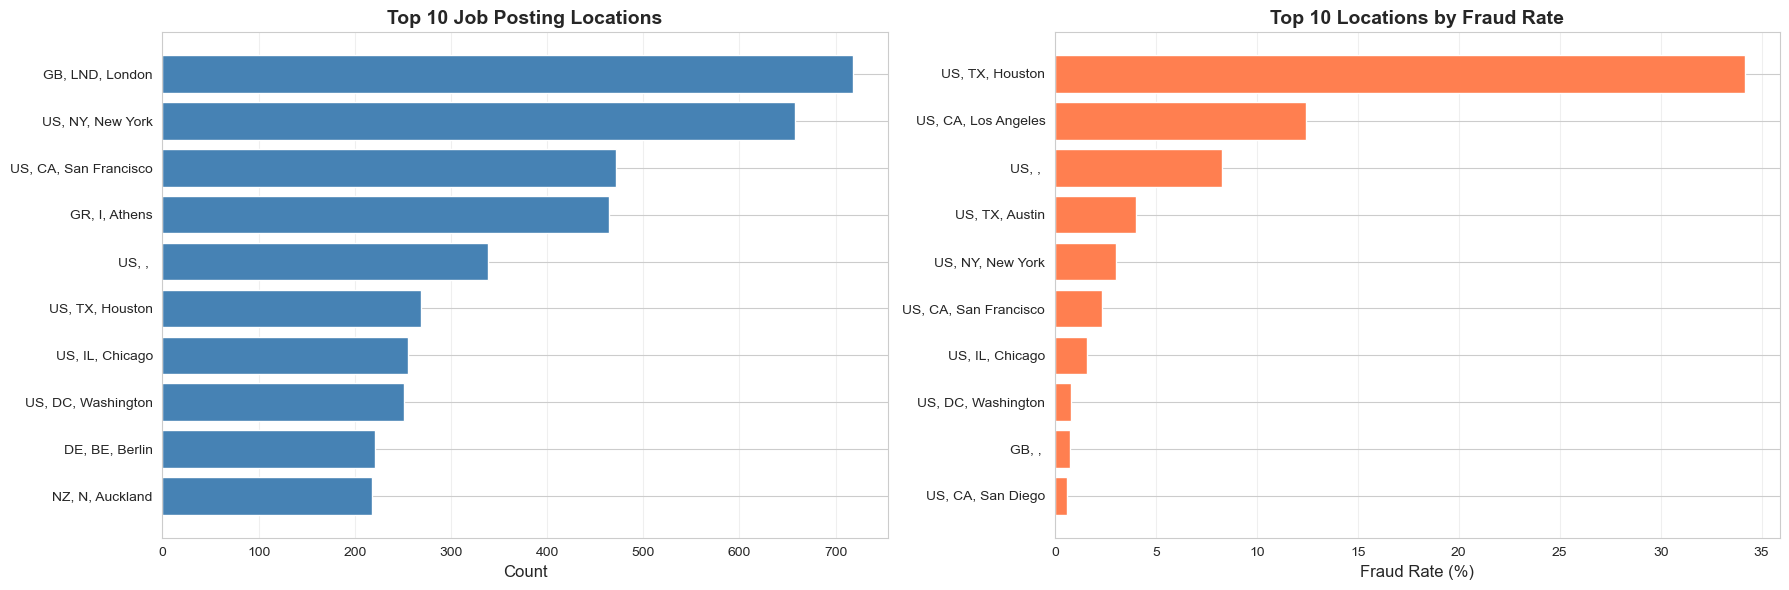

In [15]:
print("="*80)
print("LOCATION ANALYSIS")
print("="*80)

# Top locations
top_locations = df['location'].value_counts().head(15)
print("\nTop 15 Locations:")
print(top_locations.to_string())

# Fraud rate by top locations
top_loc_list = top_locations.index.tolist()
location_fraud = df[df['location'].isin(top_loc_list)].groupby('location')['fraudulent'].agg(['sum', 'count', 'mean'])
location_fraud.columns = ['Fake_Count', 'Total_Count', 'Fraud_Rate']
location_fraud = location_fraud.sort_values('Fraud_Rate', ascending=False)

print("\nFraud Rate by Top Locations:")
print(location_fraud.head(10).to_string())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top locations
axes[0].barh(top_locations.index[:10], top_locations.values[:10], color='steelblue')
axes[0].set_xlabel('Count', fontsize=12)
axes[0].set_title('Top 10 Job Posting Locations', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Fraud rate
top_fraud_locs = location_fraud.head(10)
axes[1].barh(top_fraud_locs.index, top_fraud_locs['Fraud_Rate'] * 100, color='coral')
axes[1].set_xlabel('Fraud Rate (%)', fontsize=12)
axes[1].set_title('Top 10 Locations by Fraud Rate', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../Data/delivrables/location_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 11. Correlation analysis

CORRELATION ANALYSIS


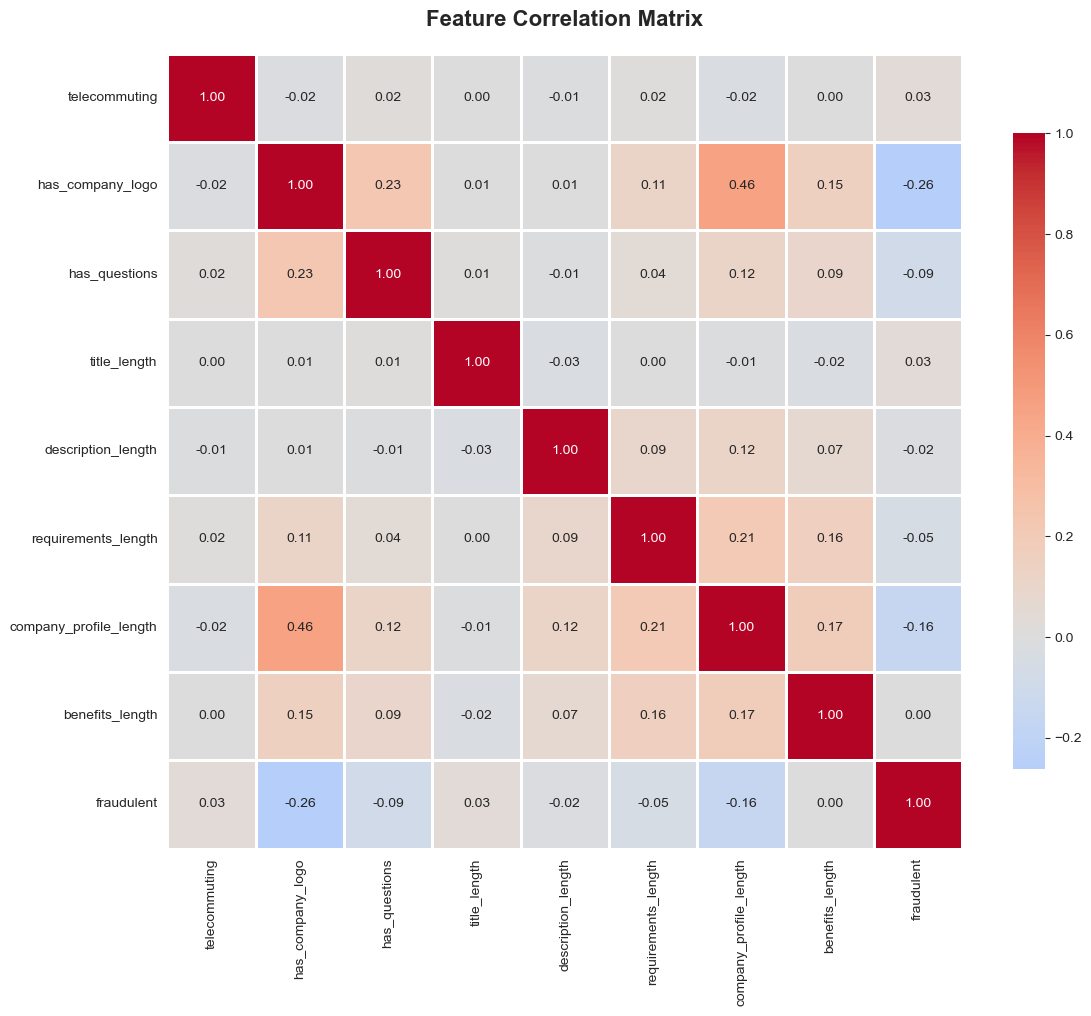


Features Correlation with Fraudulent:
fraudulent                1.000000
title_length              0.034741
telecommuting             0.034523
benefits_length           0.002209
description_length       -0.015927
requirements_length      -0.053013
has_questions            -0.091627
company_profile_length   -0.155065
has_company_logo         -0.261971


In [16]:
print("="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Select numeric/boolean features
numeric_features = ['telecommuting', 'has_company_logo', 'has_questions', 
                   'title_length', 'description_length', 'requirements_length',
                   'company_profile_length', 'benefits_length', 'fraudulent']

# Compute correlation
corr_matrix = df[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../Data/delivrables/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Show features most correlated with fraud
fraud_corr = corr_matrix['fraudulent'].sort_values(ascending=False)
print("\nFeatures Correlation with Fraudulent:")
print(fraud_corr.to_string())

# 12. Industry analysis


INDUSTRY ANALYSIS

Top 15 Industries:
industry
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
Financial Services                      779
Hospital & Health Care                  497
Consumer Services                       358
Telecommunications                      342
Oil & Energy                            287
Retail                                  223
Real Estate                             175
Accounting                              159
Construction                            158
E-Learning                              139

Top 10 Industries by Fraud Rate (min 50 postings):
                              Fake_Count  Total_Count  Fraud_Rate
industry                                                         
Oil & Energy                         109          287    0.379791
Accounting                            57   

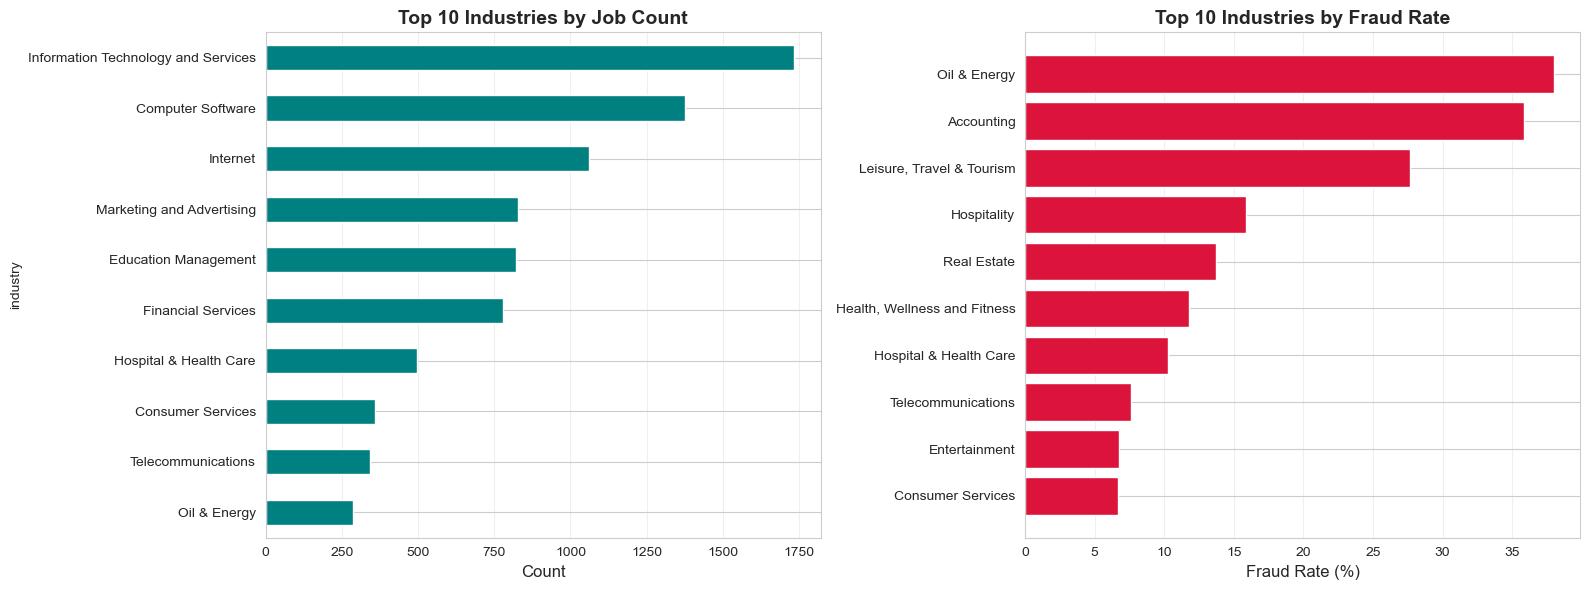

In [17]:
print("="*80)
print("INDUSTRY ANALYSIS")
print("="*80)

# Top industries
top_industries = df['industry'].value_counts().head(15)
print("\nTop 15 Industries:")
print(top_industries.to_string())

# Fraud rate by industry
industry_fraud = df.groupby('industry')['fraudulent'].agg(['sum', 'count', 'mean'])
industry_fraud.columns = ['Fake_Count', 'Total_Count', 'Fraud_Rate']
industry_fraud = industry_fraud[industry_fraud['Total_Count'] >= 50]  # Min 50 postings
industry_fraud = industry_fraud.sort_values('Fraud_Rate', ascending=False)

print("\nTop 10 Industries by Fraud Rate (min 50 postings):")
print(industry_fraud.head(10).to_string())

# Visualization
fig = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
top_industries.head(10).plot(kind='barh', color='teal')
plt.xlabel('Count', fontsize=12)
plt.title('Top 10 Industries by Job Count', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

plt.subplot(1, 2, 2)
top_fraud_ind = industry_fraud.head(10)
plt.barh(top_fraud_ind.index, top_fraud_ind['Fraud_Rate'] * 100, color='crimson')
plt.xlabel('Fraud Rate (%)', fontsize=12)
plt.title('Top 10 Industries by Fraud Rate', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../Data/delivrables/industry_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 13. Salary range analysis


SALARY RANGE ANALYSIS

Salary Range Present: 2,868 (16.0%)
Salary Range Missing: 15,012 (84.0%)

Real jobs with salary: 15.5%
Fake jobs with salary: 25.8%
Difference: 10.2%


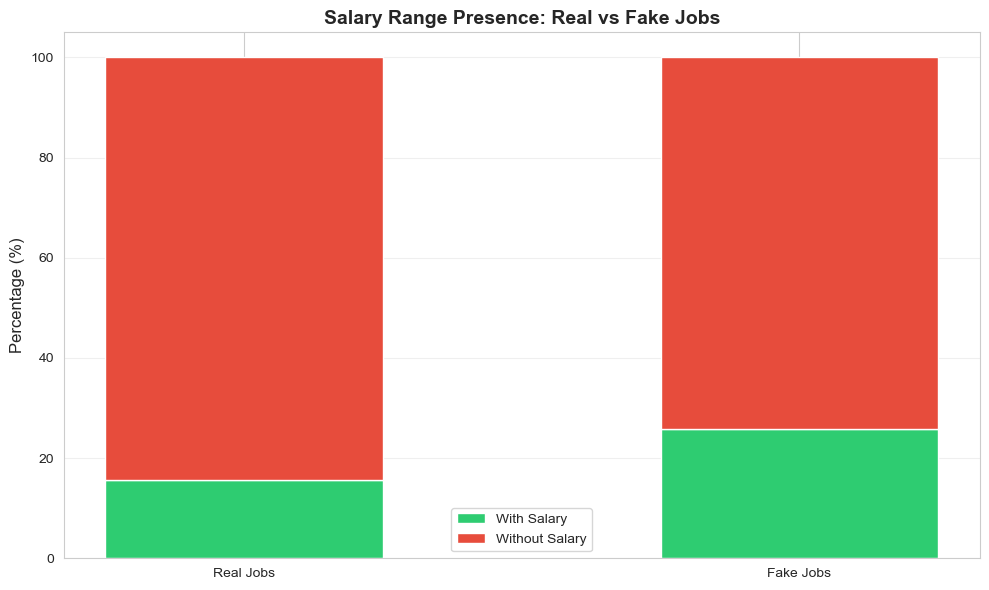


🔑 KEY INSIGHT: Real jobs more likely to include salary information!


In [18]:
print("="*80)
print("SALARY RANGE ANALYSIS")
print("="*80)

# Check salary range presence
salary_present = df['salary_range'].notna().sum()
salary_missing = df['salary_range'].isna().sum()

print(f"\nSalary Range Present: {salary_present:,} ({salary_present/len(df)*100:.1f}%)")
print(f"Salary Range Missing: {salary_missing:,} ({salary_missing/len(df)*100:.1f}%)")

# Compare real vs fake
salary_real = df[df['fraudulent'] == 0]['salary_range'].notna().mean() * 100
salary_fake = df[df['fraudulent'] == 1]['salary_range'].notna().mean() * 100

print(f"\nReal jobs with salary: {salary_real:.1f}%")
print(f"Fake jobs with salary: {salary_fake:.1f}%")
print(f"Difference: {abs(salary_real - salary_fake):.1f}%")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['Real Jobs', 'Fake Jobs']
with_salary = [salary_real, salary_fake]
without_salary = [100 - salary_real, 100 - salary_fake]

x = np.arange(len(categories))
width = 0.5

p1 = ax.bar(x, with_salary, width, label='With Salary', color='#2ecc71')
p2 = ax.bar(x, without_salary, width, bottom=with_salary, label='Without Salary', color='#e74c3c')

ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Salary Range Presence: Real vs Fake Jobs', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../Data/delivrables/salary_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🔑 KEY INSIGHT: Real jobs more likely to include salary information!")

# 14. Generate summary statistics


In [19]:
print("="*80)
print("SUMMARY STATISTICS - DELIVERABLE")
print("="*80)

summary_stats = {
    'Dataset Overview': {
        'Total Rows': len(df),
        'Total Features': df.shape[1],
        'Real Jobs': int(df['fraudulent'].value_counts()[0]),
        'Fake Jobs': int(df['fraudulent'].value_counts()[1]),
        'Imbalance Ratio': f"{df['fraudulent'].value_counts()[0] / df['fraudulent'].value_counts()[1]:.2f}:1"
    },
    'Missing Values': {
        'Columns with Missing': int((df.isnull().sum() > 0).sum()),
        'Most Missing Column': df.isnull().sum().idxmax(),
        'Max Missing Percentage': f"{(df.isnull().sum().max() / len(df) * 100):.2f}%"
    },
    'Key Insights': {
        'Fake jobs without logo': f"{(1 - df[df['fraudulent'] == 1]['has_company_logo'].mean()) * 100:.1f}%",
        'Real jobs without logo': f"{(1 - df[df['fraudulent'] == 0]['has_company_logo'].mean()) * 100:.1f}%",
        'Fake jobs without questions': f"{(1 - df[df['fraudulent'] == 1]['has_questions'].mean()) * 100:.1f}%",
        'Real jobs with salary': f"{df[df['fraudulent'] == 0]['salary_range'].notna().mean() * 100:.1f}%",
        'Fake jobs with salary': f"{df[df['fraudulent'] == 1]['salary_range'].notna().mean() * 100:.1f}%"
    },
    'Text Features': {
        'Avg Description Length (Real)': f"{df[df['fraudulent'] == 0]['description_length'].mean():.0f} chars",
        'Avg Description Length (Fake)': f"{df[df['fraudulent'] == 1]['description_length'].mean():.0f} chars",
        'Avg Requirements Length (Real)': f"{df[df['fraudulent'] == 0]['requirements_length'].mean():.0f} chars",
        'Avg Requirements Length (Fake)': f"{df[df['fraudulent'] == 1]['requirements_length'].mean():.0f} chars"
    }
}

# Print summary
import json
print(json.dumps(summary_stats, indent=2))

# Save to JSON
with open('../Data/delivrables/data_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=2)

print("\n✅ Summary statistics saved to: Data/delivrables/data_summary.json")

SUMMARY STATISTICS - DELIVERABLE
{
  "Dataset Overview": {
    "Total Rows": 17880,
    "Total Features": 24,
    "Real Jobs": 17014,
    "Fake Jobs": 866,
    "Imbalance Ratio": "19.65:1"
  },
  "Missing Values": {
    "Columns with Missing": 12,
    "Most Missing Column": "salary_range",
    "Max Missing Percentage": "83.96%"
  },
  "Key Insights": {
    "Fake jobs without logo": "67.3%",
    "Real jobs without logo": "18.1%",
    "Fake jobs without questions": "71.1%",
    "Real jobs with salary": "15.5%",
    "Fake jobs with salary": "25.8%"
  },
  "Text Features": {
    "Avg Description Length (Real)": "1221 chars",
    "Avg Description Length (Fake)": "1155 chars",
    "Avg Requirements Length (Real)": "597 chars",
    "Avg Requirements Length (Fake)": "446 chars"
  }
}

✅ Summary statistics saved to: Data/delivrables/data_summary.json


# 15. Export HTML report and notebook


In [20]:
import json
from datetime import datetime

print("="*80)
print("EXPORTING EDA DELIVRABLES")
print("="*80)

# Create HTML report
html_report = f"""
<!DOCTYPE html>
<html>
<head>
    <title>EDA Report - Fake Job Posting Detection</title>
    <style>
        body {{ font-family: Arial, sans-serif; margin: 40px; background-color: #f5f5f5; }}
        .container {{ background: white; padding: 30px; border-radius: 10px; box-shadow: 0 2px 10px rgba(0,0,0,0.1); }}
        h1 {{ color: #2c3e50; border-bottom: 3px solid #3498db; padding-bottom: 10px; }}
        h2 {{ color: #34495e; margin-top: 30px; }}
        table {{ border-collapse: collapse; width: 100%; margin: 20px 0; }}
        th, td {{ border: 1px solid #ddd; padding: 12px; text-align: left; }}
        th {{ background-color: #3498db; color: white; }}
        tr:nth-child(even) {{ background-color: #f2f2f2; }}
        .insight {{ background: #e8f4f8; padding: 15px; border-left: 4px solid #3498db; margin: 20px 0; }}
        .stat {{ display: inline-block; margin: 10px; padding: 15px; background: #ecf0f1; border-radius: 5px; }}
    </style>
</head>
<body>
    <div class="container">
        <h1>📊 Exploratory Data Analysis Report</h1>
        <p><strong>Project:</strong> Fake Job Posting Detection</p>
        <p><strong>Date:</strong> {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}</p>
        
        <h2>1. Dataset Overview</h2>
        <div class="stat"><strong>Total Rows:</strong> {len(df):,}</div>
        <div class="stat"><strong>Total Features:</strong> {df.shape[1]}</div>
        <div class="stat"><strong>Real Jobs:</strong> {df['fraudulent'].value_counts()[0]:,}</div>
        <div class="stat"><strong>Fake Jobs:</strong> {df['fraudulent'].value_counts()[1]:,}</div>
        
        <div class="insight">
            <strong>⚠️ Critical Finding:</strong> Dataset is highly imbalanced with only 
            {(df['fraudulent'].sum() / len(df) * 100):.2f}% fake jobs. 
            This requires special handling (SMOTE, class weights).
        </div>
        
        <h2>2. Key Insights</h2>
        <table>
            <tr>
                <th>Feature</th>
                <th>Real Jobs</th>
                <th>Fake Jobs</th>
                <th>Difference</th>
            </tr>
            <tr>
                <td>Has Company Logo</td>
                <td>{df[df['fraudulent'] == 0]['has_company_logo'].mean() * 100:.1f}%</td>
                <td>{df[df['fraudulent'] == 1]['has_company_logo'].mean() * 100:.1f}%</td>
                <td style="color: red; font-weight: bold;">
                    {abs(df[df['fraudulent'] == 0]['has_company_logo'].mean() - df[df['fraudulent'] == 1]['has_company_logo'].mean()) * 100:.1f}%
                </td>
            </tr>
            <tr>
                <td>Has Questions</td>
                <td>{df[df['fraudulent'] == 0]['has_questions'].mean() * 100:.1f}%</td>
                <td>{df[df['fraudulent'] == 1]['has_questions'].mean() * 100:.1f}%</td>
                <td style="color: red; font-weight: bold;">
                    {abs(df[df['fraudulent'] == 0]['has_questions'].mean() - df[df['fraudulent'] == 1]['has_questions'].mean()) * 100:.1f}%
                </td>
            </tr>
            <tr>
                <td>Has Salary Range</td>
                <td>{df[df['fraudulent'] == 0]['salary_range'].notna().mean() * 100:.1f}%</td>
                <td>{df[df['fraudulent'] == 1]['salary_range'].notna().mean() * 100:.1f}%</td>
                <td style="color: red; font-weight: bold;">
                    {abs(df[df['fraudulent'] == 0]['salary_range'].notna().mean() - df[df['fraudulent'] == 1]['salary_range'].notna().mean()) * 100:.1f}%
                </td>
            </tr>
        </table>
        
        <h2>3. Recommendations for Preprocessing</h2>
        <ol>
            <li><strong>Handle Missing Values:</strong> Fill NaN with "N/A" or empty string for text features</li>
            <li><strong>Combine Text Features:</strong> Create 'full_text' by concatenating title, description, requirements</li>
            <li><strong>Address Imbalance:</strong> Use SMOTE or class_weight='balanced' in models</li>
            <li><strong>Feature Engineering:</strong> Add text length, email presence, URL presence features</li>
            <li><strong>Encode Categoricals:</strong> Use LabelEncoder or OneHotEncoder for categorical features</li>
        </ol>
        
        <h2>4. Generated Visualizations</h2>
        <ul>
            <li>target_distribution.png - Class imbalance visualization</li>
            <li>missing_values.png - Missing data analysis</li>
            <li>text_length_analysis.png - Text feature distributions</li>
            <li>wordcloud_comparison.png - Most frequent words</li>
            <li>categorical_analysis.png - Categorical feature insights</li>
            <li>boolean_features.png - Boolean feature comparison</li>
            <li>location_analysis.png - Geographic distribution</li>
            <li>industry_analysis.png - Industry patterns</li>
            <li>correlation_matrix.png - Feature correlations</li>
            <li>salary_analysis.png - Salary presence patterns</li>
        </ul>
        
        <div class="insight">
            <strong>✅ Next Steps:</strong> Proceed to preprocessing phase with special attention to 
            imbalanced data handling and text feature engineering.
        </div>
    </div>
</body>
</html>
"""

# Save HTML report
with open('../Data/delivrables/EDA_Report.html', 'w', encoding='utf-8') as f:
    f.write(html_report)

print("✅ HTML Report saved: Data/delivrables/EDA_Report.html")
print("✅ JSON Summary saved: Data/delivrables/data_summary.json")
print("✅ All visualizations saved in: Data/delivrables/")
print("\n" + "="*80)
print("EDA COMPLETE! Ready for preprocessing phase.")
print("="*80)

EXPORTING EDA DELIVRABLES
✅ HTML Report saved: Data/delivrables/EDA_Report.html
✅ JSON Summary saved: Data/delivrables/data_summary.json
✅ All visualizations saved in: Data/delivrables/

EDA COMPLETE! Ready for preprocessing phase.
